<a href="https://colab.research.google.com/github/Veynitha/Y4S1_DL/blob/main/IT21298394.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [52]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout


In [53]:
# Install Kaggle and download dataset
!pip install -q kaggle
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

# Download Automobile Insurance dataset from Kaggle
!kaggle datasets download -d aashishjhamtani/automobile-insurance

# Unzip the downloaded dataset
!unzip automobile-insurance.zip


cp: cannot stat 'kaggle.json': No such file or directory
chmod: cannot access '/root/.kaggle/kaggle.json': No such file or directory
Dataset URL: https://www.kaggle.com/datasets/aashishjhamtani/automobile-insurance
License(s): unknown
automobile-insurance.zip: Skipping, found more recently modified local copy (use --force to force download)
Archive:  automobile-insurance.zip
replace insurance_claims.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: A
  inflating: insurance_claims.csv    
  inflating: insurance_data_set.csv  


In [54]:
# Load the dataset
df = pd.read_csv('/content/insurance_claims.csv')

# Check the first few rows of the dataset
print(df.head())

# Get summary statistics
print(df.describe())

# Check for missing values
print(df.isnull().sum())


   months_as_customer  age  policy_number policy_bind_date policy_state  \
0                 328   48         521585       2014-10-17           OH   
1                 228   42         342868       2006-06-27           IN   
2                 134   29         687698       2000-09-06           OH   
3                 256   41         227811       1990-05-25           IL   
4                 228   44         367455       2014-06-06           IL   

  policy_csl  policy_deductable  policy_annual_premium  umbrella_limit  \
0    250/500               1000                1406.91               0   
1    250/500               2000                1197.22         5000000   
2    100/300               2000                1413.14         5000000   
3    250/500               2000                1415.74         6000000   
4   500/1000               1000                1583.91         6000000   

   insured_zip  ... police_report_available total_claim_amount injury_claim  \
0       466132  ...      

In [55]:
# Drop irrelevant columns
df = df.drop(columns=['policy_number', 'policy_bind_date', 'insured_zip', '_c39', 'incident_location'])

# Check the updated dataset structure
print(df.info())

# Check the column names of the dataset
print(df.columns)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 35 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           1000 non-null   int64  
 1   age                          1000 non-null   int64  
 2   policy_state                 1000 non-null   object 
 3   policy_csl                   1000 non-null   object 
 4   policy_deductable            1000 non-null   int64  
 5   policy_annual_premium        1000 non-null   float64
 6   umbrella_limit               1000 non-null   int64  
 7   insured_sex                  1000 non-null   object 
 8   insured_education_level      1000 non-null   object 
 9   insured_occupation           1000 non-null   object 
 10  insured_hobbies              1000 non-null   object 
 11  insured_relationship         1000 non-null   object 
 12  capital-gains                1000 non-null   int64  
 13  capital-loss       

In [56]:
# Import necessary libraries for preprocessing
from sklearn.preprocessing import LabelEncoder, StandardScaler
import pandas as pd

# Create a copy of the dataframe to avoid changes to the original
df_copy = df.copy()

# Convert 'incident_date' to datetime and extract features from it
df_copy['incident_date'] = pd.to_datetime(df_copy['incident_date'])
df_copy['incident_year'] = df_copy['incident_date'].dt.year
df_copy['incident_month'] = df_copy['incident_date'].dt.month
df_copy['incident_day'] = df_copy['incident_date'].dt.day
df_copy['incident_day_of_week'] = df_copy['incident_date'].dt.dayofweek
df_copy = df_copy.drop(columns=['incident_date'])

# Encode categorical features using LabelEncoder
labelencoder = LabelEncoder()

# List of categorical columns including the one causing the issue
categorical_cols = ['policy_state', 'policy_csl', 'insured_sex', 'insured_education_level',
                    'insured_occupation', 'insured_hobbies', 'insured_relationship',
                    'incident_type', 'collision_type', 'incident_severity',  # Include 'incident_severity'
                    'authorities_contacted', 'incident_state', 'incident_city',
                    'property_damage', 'police_report_available', 'auto_make', 'auto_model']

# Apply LabelEncoder to all categorical columns
for col in categorical_cols:
    df_copy[col] = labelencoder.fit_transform(df_copy[col].astype(str))  # Convert to string in case of missing values

# Scale numerical features using StandardScaler
scaler = StandardScaler()

# List of numerical columns to scale
numerical_cols = ['age', 'policy_deductable', 'policy_annual_premium', 'umbrella_limit',
                  'capital-gains', 'capital-loss', 'incident_hour_of_the_day',
                  'total_claim_amount', 'injury_claim', 'property_claim', 'vehicle_claim']

# Apply scaling to numerical columns
df_copy[numerical_cols] = scaler.fit_transform(df_copy[numerical_cols])

# Check the updated DataFrame after encoding and scaling
print(df_copy.head())


   months_as_customer       age  policy_state  policy_csl  policy_deductable  \
0                 328  0.990836             2           1          -0.222383   
1                 228  0.334073             1           1           1.412784   
2                 134 -1.088913             2           0           1.412784   
3                 256  0.224613             0           1           1.412784   
4                 228  0.552994             0           2          -0.222383   

   policy_annual_premium  umbrella_limit  insured_sex  \
0               0.616705       -0.479476            1   
1              -0.242521        1.697980            1   
2               0.642233        1.697980            0   
3               0.652886        2.133471            0   
4               1.341980        2.133471            1   

   insured_education_level  insured_occupation  ...  property_claim  \
0                        4                   2  ...        1.165505   
1                        4        

In [69]:
# Separate features (X) and target (y)
X = df_copy.drop(columns=['fraud_reported'])  # Assuming 'fraud_reported' is the target column
y = df_copy['fraud_reported']

# Split into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Verify the shapes of the resulting sets
print(f"Training set shape: {X_train.shape}, {y_train.shape}")
print(f"Testing set shape: {X_test.shape}, {y_test.shape}")



# Convert target variable y_train from strings to integers
y_train = np.where(y_train == 'Y', 1, 0)

# Repeat the same for y_test to ensure consistency
y_test = np.where(y_test == 'Y', 1, 0)

# Verify the unique values after conversion
print("Unique values in y_train after conversion:", np.unique(y_train))
print("Unique values in y_test after conversion:", np.unique(y_test))


Training set shape: (800, 37), (800,)
Testing set shape: (200, 37), (200,)
Unique values in y_train after conversion: [0 1]
Unique values in y_test after conversion: [0 1]


In [70]:
# Initialize the ANN model
model = Sequential()

# Input layer and first hidden layer
model.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))
model.add(Dropout(0.3))  # Dropout to prevent overfitting

# Second hidden layer
model.add(Dense(32, activation='relu'))

# Output layer
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Summary of the model
model.summary()


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_18 (Dense)                     │ (None, 64)                  │           2,432 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_6 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_19 (Dense)                     │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_20 (Dense)                     │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4,545 (17.75 KB)

 Trainable params: 4,545 (17.75 KB)

 Non-trainable params: 0 (0.00 B)

In [72]:
# Check unique values in the target variable
print("Unique values in y_train:", np.unique(y_train))


Unique values in y_train: [0 1]


In [73]:
# Train the model for 30 epochs with batch size 32
history = model.fit(X_train, y_train, validation_split=0.2, epochs=30, batch_size=32)


Epoch 1/30
20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - accuracy: 0.2632 - loss: 424.1401 - val_accuracy: 0.7500 - val_loss: 56.9055
Epoch 2/30
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7242 - loss: 76.0647 - val_accuracy: 0.7500 - val_loss: 42.3151
Epoch 3/30
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6547 - loss: 43.9840 - val_accuracy: 0.7500 - val_loss: 14.6895
Epoch 4/30
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6021 - loss: 42.6629 - val_accuracy: 0.7500 - val_loss: 25.1294
Epoch 5/30
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6579 - loss: 35.9673 - val_accuracy: 0.7500 - val_loss: 18.8010
Epoch 6/30
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6199 - loss: 33.6909 - val_accuracy: 0.7500 - val_loss: 27.4965
Epoch 7/30
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6218 - loss: 27.2727 - val_accuracy: 0.7500 - val_loss: 27.6801
Epoch 8/30
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6286 - loss: 27.7870 - val_accuracy: 0

In [74]:
# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_acc:.2f}")

# Make predictions on the test set
y_pred = (model.predict(X_test) > 0.5).astype("int32")

# Import necessary metrics for evaluation
from sklearn.metrics import confusion_matrix, classification_report

# Print confusion matrix
print(confusion_matrix(y_test, y_pred))

# Print classification report
print(classification_report(y_test, y_pred))


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7495 - loss: 1.0574  
Test Accuracy: 0.73
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
[[145   0]
 [ 55   0]]
              precision    recall  f1-score   support

           0       0.72      1.00      0.84       145
           1       0.00      0.00      0.00        55

    accuracy                           0.72       200
   macro avg       0.36      0.50      0.42       200
weighted avg       0.53      0.72      0.61       200



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


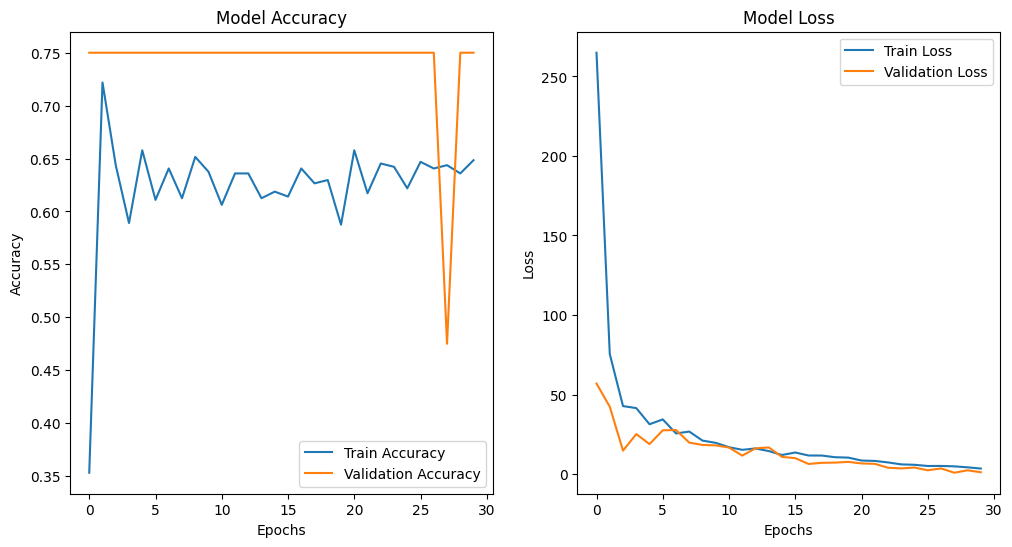

In [75]:
# Plot accuracy over epochs
plt.figure(figsize=(12, 6))

# Plot Accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Plot Loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()
